# Tải dữ liệu

In [ ]:
import pandas as pd

# Đường dẫn tệp
file_path = "/content/cpi_df.csv"

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Hiển thị một số dòng đầu tiên
df.head()


,time,cpi_mom,cpi_yoy,cpi_yoy_diff,cpi_mom_log,cpi_mom_log_lag_1,cpi_mom_log_lag_12,cpi_yoy_diff_lag_1,cpi_yoy_diff_lag_12,cpi_mom_log_pct_change,...,cpi_mom_log_window_2,cpi_yoy_diff_window_2,cpi_mom_log_window_3,cpi_yoy_diff_window_3,cpi_mom_log_window_4,cpi_yoy_diff_window_4,cpi_mom_log_window_5,cpi_yoy_diff_window_5,cpi_mom_log_window_6,cpi_yoy_diff_window_6
0,1996-01-01,100.9,109.76,-3.15,4.614130,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-02-01,102.5,108.80,-0.96,4.629863,4.614130,NaN,-3.15,NaN,0.003410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-03-01,100.8,109.46,0.66,4.613138,4.629863,NaN,-0.96,NaN,-0.003612,...,4.614130,-3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-04-01,100.1,108.48,-0.98,4.606170,4.613138,NaN,0.66,NaN,-0.001511,...,4.629863,-0.96,4.614130,-3.15,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-05-01,99.5,106.03,-2.45,4.600158,4.606170,NaN,-0.98,NaN,-0.001305,...,4.613138,0.66,4.629863,-0.96,4.61413,-3.15,NaN,NaN,NaN,NaN


In [ ]:
# Sắp xếp dữ liệu theo thời gian
df = df.sort_values(by='time')

# Đặt cột 'time' làm chỉ mục
df.set_index('time', inplace=True)

# Hiển thị thông tin của dataframe sau khi xử lý
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 1996-01-01 to 2024-12-01
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpi_mom                   348 non-null    float64
 1   cpi_yoy                   348 non-null    float64
 2   cpi_yoy_diff              348 non-null    float64
 3   cpi_mom_log               348 non-null    float64
 4   cpi_mom_log_lag_1         347 non-null    float64
 5   cpi_mom_log_lag_12        336 non-null    float64
 6   cpi_yoy_diff_lag_1        347 non-null    float64
 7   cpi_yoy_diff_lag_12       336 non-null    float64
 8   cpi_mom_log_pct_change    347 non-null    float64
 9   cpi_yoy_diff_pct_change   345 non-null    float64
 10  cpi_mom_log_seasonal_12   336 non-null    float64
 11  cpi_mom_log_seasonal_24   324 non-null    float64
 12  cpi_yoy_diff_seasonal_12  336 non-null    float64
 13  cpi_yoy_diff_seasonal_24  324 non-null    float64
 14 

(None,
             cpi_mom  cpi_yoy  cpi_yoy_diff  cpi_mom_log  cpi_mom_log_lag_1  \
 time                                                                         
 1996-01-01    100.9   109.76         -3.15     4.614130                NaN   
 1996-02-01    102.5   108.80         -0.96     4.629863           4.614130   
 1996-03-01    100.8   109.46          0.66     4.613138           4.629863   
 1996-04-01    100.1   108.48         -0.98     4.606170           4.613138   
 1996-05-01     99.5   106.03         -2.45     4.600158           4.606170   
 
             cpi_mom_log_lag_12  cpi_yoy_diff_lag_1  cpi_yoy_diff_lag_12  \
 time                                                                      
 1996-01-01                 NaN                 NaN                  NaN   
 1996-02-01                 NaN               -3.15                  NaN   
 1996-03-01                 NaN               -0.96                  NaN   
 1996-04-01                 NaN                0.66       

# Dự báo chuỗi thời gian CPI MoM

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính dừng của chuỗi thời gian bằng kiểm định ADF
result = adfuller(df['cpi_mom_log'])

# Trích xuất các giá trị quan trọng từ kết quả kiểm định
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values


(np.float64(-3.796367576927043),
 np.float64(0.0029446988458187028),
 {'1%': np.float64(-3.4500219858626227),
  '5%': np.float64(-2.870206553997666),
  '10%': np.float64(-2.571387268879483)})

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Chia tập dữ liệu: 80% train, 20% test
train_size = int(len(df) * 0.8)
train, test = df['cpi_mom_log'][:train_size], df['cpi_mom_log'][train_size:]

# Xây dựng mô hình ARIMA(p,d,q) - lựa chọn giá trị phù hợp dựa trên AIC
model = ARIMA(train, order=(12,0,2))
model_fit = model.fit()

# Dự báo trên tập kiểm tra
forecast = model_fit.forecast(steps=len(test))

# Tính các chỉ số đánh giá
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

mae, mse, mape


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0.003536253980398017, 2.3700876833574573e-05, 0.0007675395941321249)

In [ ]:
print("\nĐánh giá mô hình trên tập test:")
print(f"MAE (Mean Squared Error): {mae:.4f}")
print(f"MSE (Mean Absolute Error): {mse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}%")


Đánh giá mô hình trên tập test:
MAE (Mean Squared Error): 0.0035
MSE (Mean Absolute Error): 0.0000
MAPE (Mean Absolute Percentage Error): 0.0008%


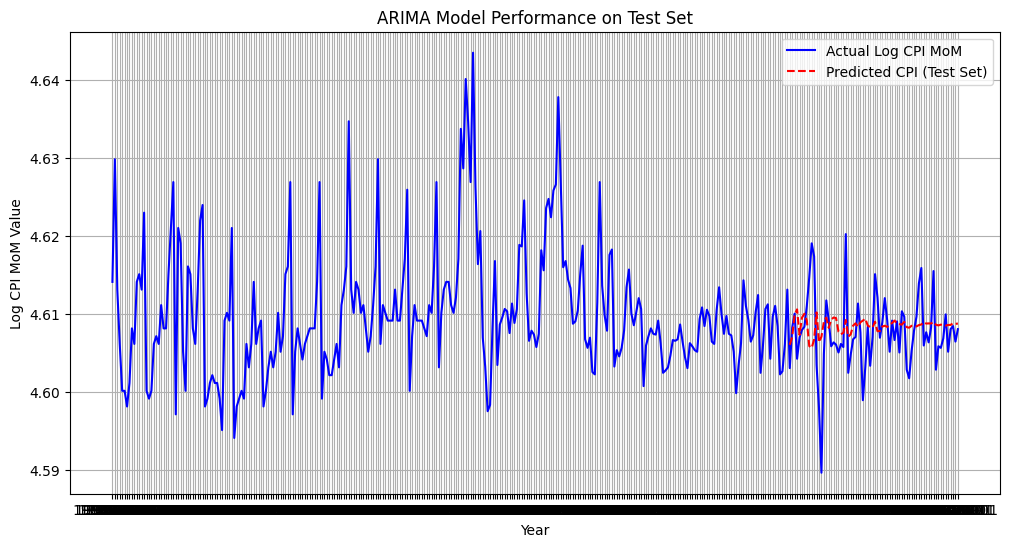

In [ ]:
# Dự báo trên tập kiểm tra
forecast_test = model_fit.predict(start=test.index[0], end=test.index[-1])

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự báo trên tập kiểm tra
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(df.index, df['cpi_mom_log'], label='Actual Log CPI MoM', color='blue')

# Vẽ giá trị dự báo trên tập kiểm tra
plt.plot(test.index, forecast_test, label='Predicted CPI (Test Set)', color='red', linestyle='dashed')

# Định dạng biểu đồ
plt.xlabel('Year')
plt.ylabel('Log CPI MoM Value')
plt.title('ARIMA Model Performance on Test Set')
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.show()


**MÔ HÌNH SARIMA**

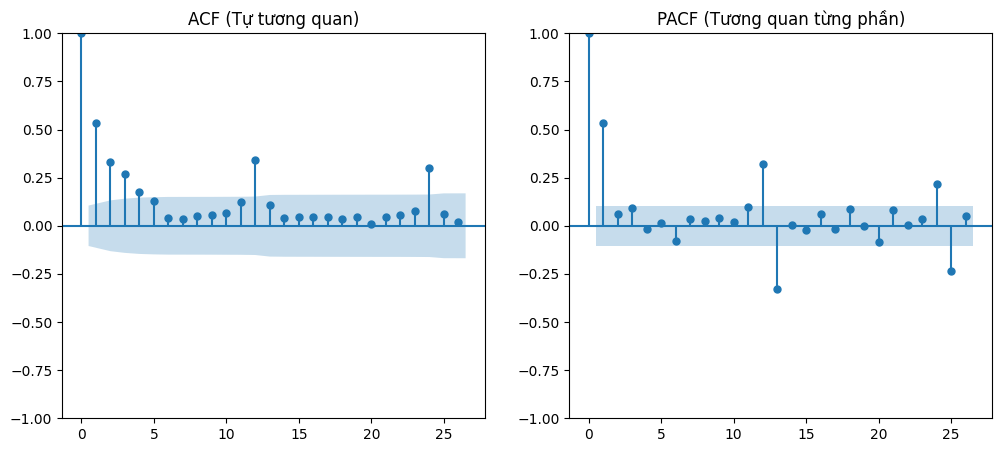

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Vẽ ACF và PACF để chọn tham số (p,q) phù hợp
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF (AutoCorrelation Function)
plot_acf(df['cpi_mom_log'], ax=axes[0])
axes[0].set_title("ACF (Tự tương quan)")

# PACF (Partial AutoCorrelation Function)
plot_pacf(df['cpi_mom_log'], ax=axes[1])
axes[1].set_title("PACF (Tương quan từng phần)")

plt.show()


In [ ]:
# Chia tập dữ liệu thành train và test (80% - 20%)
train_size = int(len(df) * 0.8)
train, test = df['cpi_mom_log'][:train_size], df['cpi_mom_log'][train_size:]

# Xây dựng mô hình SARIMA với thông số (1,1,1)(1,1,1,12)
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Dự báo trên tập kiểm tra
sarima_forecast_test = sarima_fit.predict(start=test.index[0], end=test.index[-1])

# Tính các chỉ số đánh giá
mae_sarima = mean_absolute_error(test, sarima_forecast_test)
mse_sarima = mean_squared_error(test, sarima_forecast_test)
mape_sarima = np.mean(np.abs((test - sarima_forecast_test) / test)) * 100

mae_sarima, mse_sarima, mape_sarima


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0.0035843203079434388, 2.1882365362329544e-05, nan)

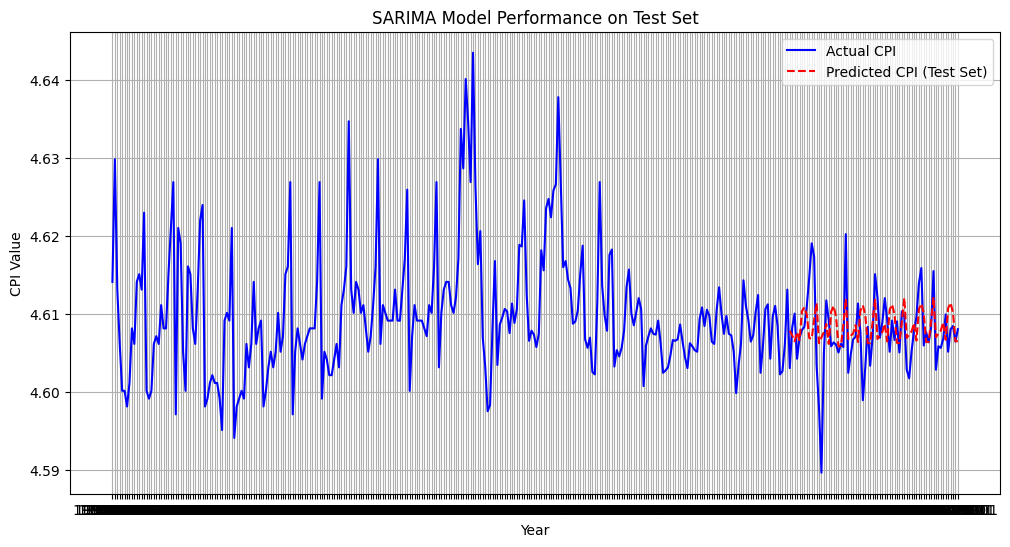

In [ ]:
# Vẽ biểu đồ so sánh giữa giá trị thực tế và dự báo trên tập kiểm tra
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(df.index, df['cpi_mom_log'], label='Actual CPI', color='blue')

# Vẽ giá trị dự báo trên tập kiểm tra
plt.plot(test.index, sarima_forecast_test, label='Predicted CPI (Test Set)', color='red', linestyle='dashed')

# Định dạng biểu đồ
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.title('SARIMA Model Performance on Test Set')
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.show()


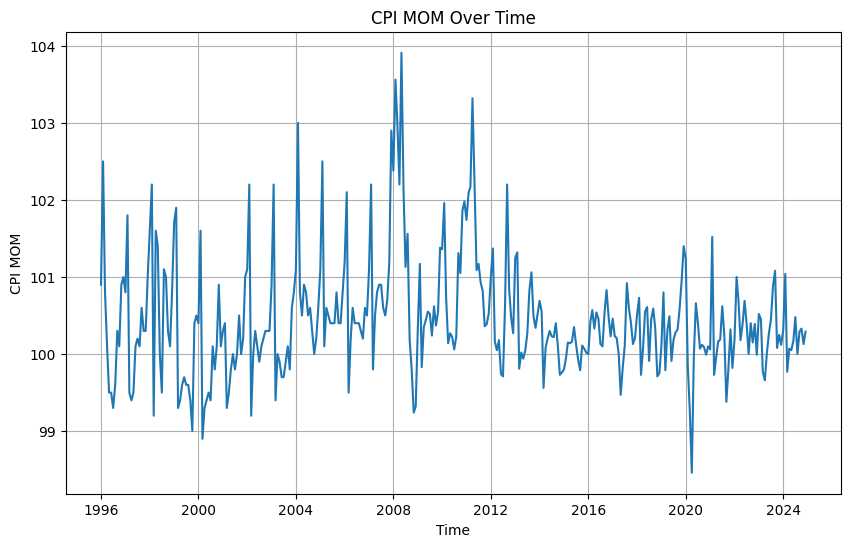

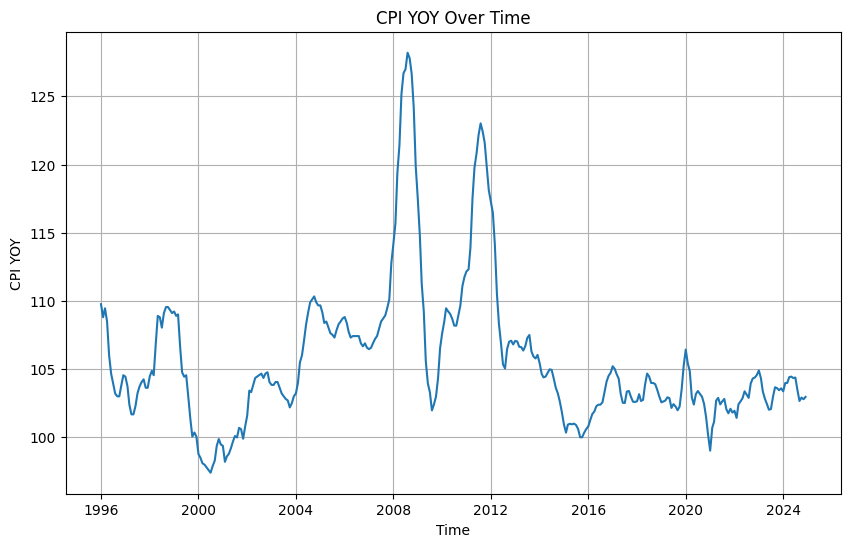

CPI MOM Time Series:
1996-01-31    100.9
1996-02-29    102.5
1996-03-31    100.8
1996-04-30    100.1
1996-05-31     99.5
Freq: ME, dtype: float64

CPI YOY Time Series:
1996-01-31    109.76
1996-02-29    108.80
1996-03-31    109.46
1996-04-30    108.48
1996-05-31    106.03
Freq: ME, dtype: float64


<ipython-input-10-55dc599e0754>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start=cpi_yoy_data['time'].min(),
<ipython-input-10-55dc599e0754>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start=cpi_mom_data['time'].min(),


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu CPI đã tiền xử lý
data = pd.read_csv("/content/cpi_df.csv")
data['time'] = pd.to_datetime(data['time'])  # Chuyển đổi thời gian về dạng datetime

# Tạo hai DataFrame riêng cho CPI MOM và CPI YOY
cpi_mom_data = pd.DataFrame({'time': data['time'], 'cpi_mom': data['cpi_mom']})
cpi_yoy_data = pd.DataFrame({'time': data['time'], 'cpi_yoy': data['cpi_yoy']})

# Vẽ biểu đồ xu hướng CPI theo thời gian
# Biểu đồ CPI MOM
plt.figure(figsize=(10, 6))
plt.plot(cpi_mom_data['time'], cpi_mom_data['cpi_mom'])
plt.xlabel("Time")
plt.ylabel("CPI MOM")
plt.title("CPI MOM Over Time")
plt.grid(True)
plt.show()

# Biểu đồ CPI YOY
plt.figure(figsize=(10, 6))
plt.plot(cpi_yoy_data['time'], cpi_yoy_data['cpi_yoy'])
plt.xlabel("Time")
plt.ylabel("CPI YOY")
plt.title("CPI YOY Over Time")
plt.grid(True)
plt.show()

# Chuyển CPI YOY thành chuỗi thời gian
# Trong Python, pandas đã tự động xử lý chuỗi thời gian qua cột 'time', không cần ts() như R
cpi_yoy = pd.Series(cpi_yoy_data['cpi_yoy'].values,
                    index=pd.date_range(start=cpi_yoy_data['time'].min(),
                                      periods=len(cpi_yoy_data),
                                      freq='M'))  # 'M' cho dữ liệu theo tháng

# Chuyển CPI MOM thành chuỗi thời gian
cpi_mom = pd.Series(cpi_mom_data['cpi_mom'].values,
                    index=pd.date_range(start=cpi_mom_data['time'].min(),
                                      periods=len(cpi_mom_data),
                                      freq='M'))  # 'M' cho dữ liệu theo tháng

# Kiểm tra dữ liệu chuỗi thời gian (tùy chọn)
print("CPI MOM Time Series:")
print(cpi_mom.head())
print("\nCPI YOY Time Series:")
print(cpi_yoy.head())

In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install numpy scipy scikit-learn statsmodels pandas Cython

In [ ]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Giả sử dữ liệu đã được nạp vào DataFrame 'data'
# data = pd.read_csv("your_data.csv")  # Nếu cần đọc từ file

# Chia tập dữ liệu thành train và test
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Huấn luyện mô hình ARIMA tối ưu trên tập train
best_arima = auto_arima(train['cpi_yoy'], seasonal=True, stepwise=True, suppress_warnings=True)

# Dự báo trên tập test
forecast_values = best_arima.predict(n_periods=len(test))

# Tính các chỉ số đánh giá
mae_arima = mean_absolute_error(test['cpi_yoy'], forecast_values)
rmse_arima = np.sqrt(mean_squared_error(test['cpi_yoy'], forecast_values))
mape_arima = np.mean(np.abs((test['cpi_yoy'] - forecast_values) / test['cpi_yoy'])) * 100
mse_arima = mean_squared_error(test['cpi_yoy'], forecast_values)
r2_arima = r2_score(test['cpi_yoy'], forecast_values)

# In kết quả
print(f"MAE ARIMA: {mae_arima:.4f}")
print(f"RMSE ARIMA: {rmse_arima:.4f}")
print(f"MAPE ARIMA: {mape_arima:.2f} %")
print(f"MSE ARIMA: {mse_arima:.4f}")
print(f"R-squared ARIMA: {r2_arima:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

MAE ARIMA: 0.9055
RMSE ARIMA: 1.2074
MAPE ARIMA: 0.88 %
MSE ARIMA: 1.4578
R-squared ARIMA: -0.0080


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
best_arima.summary()

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 20.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error

data = pd.read_csv('/content/cpi_df.csv')

cpi_yoy = data['cpi_yoy'].dropna()

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
train_size = int(len(cpi_yoy) * 0.8)
train_data = cpi_yoy[:train_size]
test_data = cpi_yoy[train_size:]

# 2. Huấn luyện mô hình GARCH
# Sử dụng GARCH(1,1) - một cấu hình phổ biến
model = arch_model(train_data, vol='Garch', p=12, q=1, dist='normal')
garch_fit = model.fit(disp='off')

# # In tóm tắt mô hình
# print(garch_fit.summary())

# 3. Dự đoán
# Dự đoán độ biến động (volatility) cho tập kiểm tra
forecast = garch_fit.forecast(horizon=len(test_data))

# Lấy giá trị dự đoán (mean) từ forecast
# Với GARCH, ta thường dự đoán độ biến động, nhưng ở đây ta cần giá trị trung bình của cpi_yoy
# Do đó, ta sẽ sử dụng giá trị thực tế làm tham chiếu và thêm độ biến động dự đoán
predicted_mean = forecast.mean.values[-1, :]  # Giá trị trung bình dự đoán
predicted_volatility = np.sqrt(forecast.variance.values[-1, :])  # Độ biến động dự đoán

# Giả định giá trị dự đoán là giá trị trung bình của train_data cộng với độ biến động
last_train_value = train_data.iloc[-1]
predicted_cpi_yoy = last_train_value + predicted_volatility * np.random.normal(size=len(test_data))

# 4. Đánh giá mô hình
# Tính MSE
mse = mean_squared_error(test_data, predicted_cpi_yoy)
print(f'Mean Squared Error (MSE): {mse}')

# Tính MAPE
mape = mean_absolute_percentage_error(test_data, predicted_cpi_yoy)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
# Tính R^2
r2 = r2_score(test_data, predicted_cpi_yoy)
print(f'R-squared (R²): {r2:.4f}')

# Tính MAE
mae = mean_absolute_error(test_data, predicted_cpi_yoy)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# 5. Vẽ biểu đồ so sánh (tùy chọn)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual cpi_yoy')
plt.plot(test_data.index, predicted_cpi_yoy, label='Predicted cpi_yoy', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted cpi_yoy')
plt.xlabel('Time')
plt.ylabel('cpi_yoy')
plt.show()

In [ ]:
pip install numpy pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.4 MB/s eta 0:00:00


In [ ]:
pip install numpy==1.23.5 pmdarima==2.0.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have n

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  278
Model:             SARIMAX(2, 0, 5)x(1, 0, [1, 2], 12)   Log Likelihood                -219.664
Date:                                 Fri, 04 Apr 2025   AIC                            461.329
Time:                                         09:08:18   BIC                            501.233
Sample:                                              0   HQIC                           477.338
                                                 - 278                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5779      0.189      8.343      0.000       1.207       1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


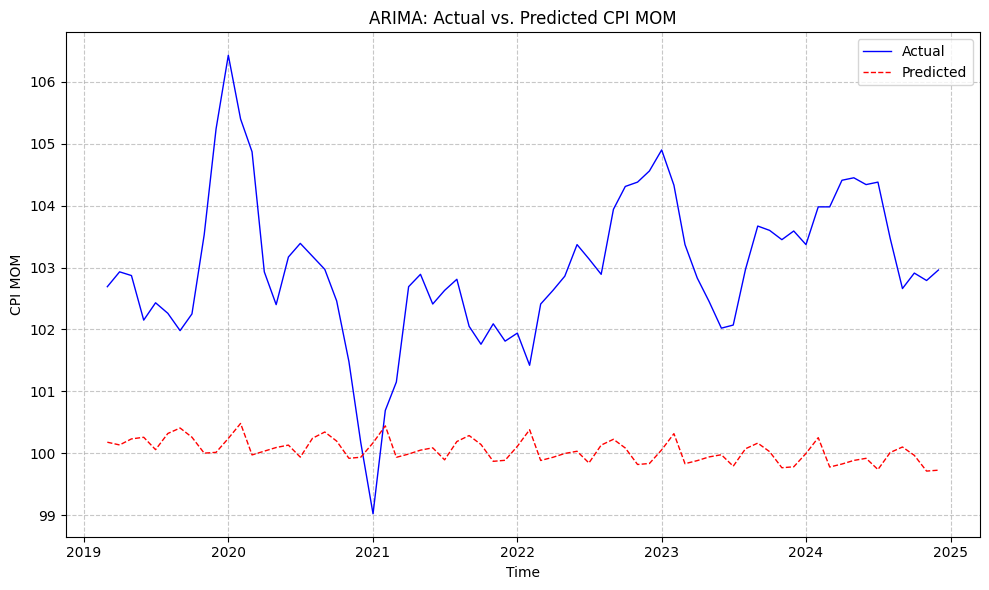

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima  # Tự động chọn mô hình ARIMA tối ưu
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score



# Giả sử dữ liệu 'data' đã được tải vào dưới dạng DataFrame
# Ví dụ: data = pd.read_csv('your_data.csv')
data = pd.read_csv("/content/cpi_df.csv")
data['time'] = pd.to_datetime(data['time'])
# Đặt seed để đảm bảo kết quả có thể lặp lại
np.random.seed(123)

# Chia tập train/test (80% train, 20% test)
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Huấn luyện mô hình ARIMA tối ưu trên tập train (CPI MoM)
# auto_arima sẽ tự động chọn tham số tối ưu, tương tự auto.arima trong R
best_arima = auto_arima(train['cpi_mom'], seasonal=True, m=12,  # m=12 cho dữ liệu theo tháng
                       stepwise=True, trace=False)

# In thông tin mô hình (tương đương summary trong R)
print(best_arima.summary())

# Dự báo trên tập test
forecast = best_arima.predict(n_periods=len(test))
predicted_values = forecast

# Tính các chỉ số đánh giá
mae_arima = mean_absolute_error(test['cpi_mom'], predicted_values)
rmse_arima = np.sqrt(mean_squared_error(test['cpi_mom'], predicted_values))
mape_arima = np.mean(np.abs((test['cpi_mom'] - predicted_values) / test['cpi_mom'])) * 100

# In kết quả
print(f"MAE ARIMA: {mae_arima:.4f}")
print(f"RMSE ARIMA: {rmse_arima:.4f}")
print(f"MAPE ARIMA: {mape_arima:.2f}%")
# Tính R²
r2_arima = r2_score(test['cpi_mom'], predicted_values)

# In kết quả
print(f"R² ARIMA: {r2_arima:.4f}")

# %% [code]
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử 'test' và 'predicted_values' đã được tính từ mô hình ARIMA trước đó
# Tạo DataFrame cho biểu đồ
df_arima = pd.DataFrame({
    'Time': test['time'],  # Sử dụng thời gian thực tế từ tập test
    'Actual': test['cpi_yoy'],
    'Predicted': predicted_values
})

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.plot(df_arima['Time'], df_arima['Actual'], label='Actual', color='blue', linewidth=1)
plt.plot(df_arima['Time'], df_arima['Predicted'], label='Predicted', color='red',
         linestyle='--', linewidth=1)

# Đặt tiêu đề và nhãn
plt.title('ARIMA: Actual vs. Predicted CPI MOM')
plt.xlabel('Time')
plt.ylabel('CPI MOM')

# Thêm legend (tương đương scale_color_manual)
plt.legend()

# Sử dụng giao diện tối giản (tương đương theme_minimal)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Trích xuất phần dư (residuals) từ mô hình ARIMA
residuals = best_arima.resid()

# Thực hiện Ljung-Box Test với 10 độ trễ (lags)
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)

print("Ljung-Box Test:")
print(lb_test)


Ljung-Box Test:
     lb_stat  lb_pvalue
12  0.202334        1.0


In [ ]:
from statsmodels.stats.diagnostic import het_arch

# Thực hiện ARCH Test
arch_test = het_arch(residuals)

print("ARCH Test:")
print(f"LM Statistic: {arch_test[0]:.4f}, p-value: {arch_test[1]:.4f}")


ARCH Test:
LM Statistic: 21.1571, p-value: 0.0200
